# Demonstration of Plotting Capabilities

This example demonstrates the plotting capability of the OpenDER model interface. Relevant example script is [here](../plot_volt-var.py).

In [1]:
import numpy as np
import opender
import matplotlib.pyplot as plt
from opender_interface.time_plots import TimePlots
from opender_interface.xy_plot import XYPlots
# temporarily stop showing interactive figures.
%matplotlib agg    

In [2]:
# create voltage profile for plotting. 
V_ss = [1, 1.03, 0.93, 1.09, 1, 0.97, 1.07, 0.91, 1]
V = np.concatenate([[v]*30 for v in V_ss])
# Set simulation time step to 1 second
t_s = opender.DER.t_s = 1

In [3]:
# create BESS DER object, and enable volt-var and volt-watt function
der_obj = opender.DER_BESS()
der_obj.der_file.QV_MODE_ENABLE = True
der_obj.der_file.PV_MODE_ENABLE = True

In [4]:
# Create time-series plot object (tplot). It has 3 rows and 1 columns. The subplot titles are configured
tplot = TimePlots(3,1, ['Voltage [pu]', 'Power output [pu]', 'Reactive power output [pu]'])
# Create steady-state chart object (xyplot)
xyplot = XYPlots(der_obj,pu=False)

In [5]:
# save a data point on steady-state chart once per 30 seconds
capture = range(20, 400, 30)

In [6]:
# Dynamic simulation and save data points
for i, V in enumerate(V):
    der_obj.update_der_input(v_pu=float(V), f=60, p_dem_pu=1)
    der_obj.run()
    
    # Save voltage, DER output P and Q to time-series plot
    tplot.add_to_traces(
        {
            'V': V,
        },
        {
            'OpenDER P': der_obj.p_out_pu,
        },
        {
            'OpenDER Q': der_obj.q_out_pu,
        },
    )
    
    # Every 30 seconds, save a datapoint to the steady-state plot
    if i>capture[0]:
        xyplot.add_point_to_plot(der_obj)
        capture = capture[1:]

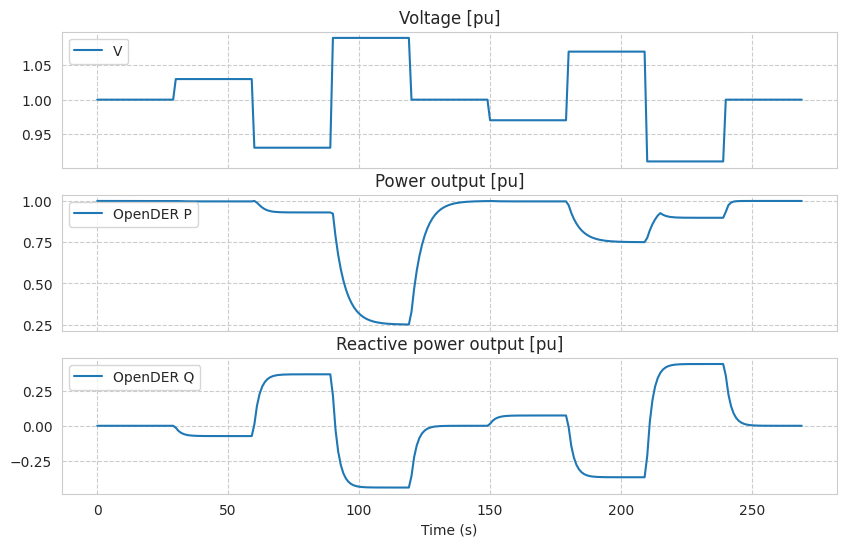

In [7]:
# Show time-series plot
%matplotlib inline
tplot.prepare()
for ax in tplot.axes:
    ax.grid()
tplot.fig.set_size_inches(10,6)
tplot.show()

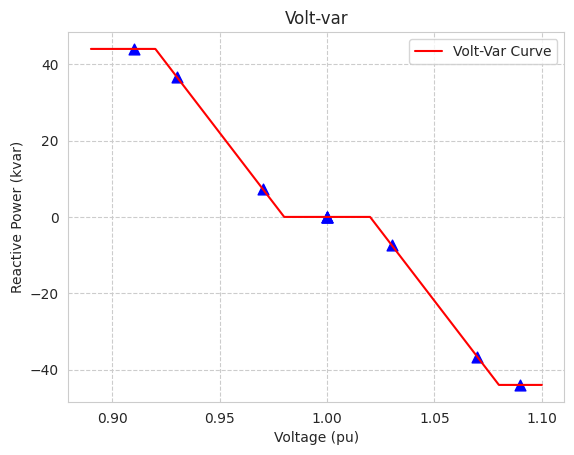

In [8]:
# show voltage-reactive power chart
xyplot.prepare_vq_plot()
xyplot.show()

Data points saved to the V-Q chart is shown as blue triangles.

Volt-var curve is shown as red lines. If not changed, IEEE 1547-2018 Category B Default settings are used

As can be seen, DER output reactive power follows the volt-var curve.

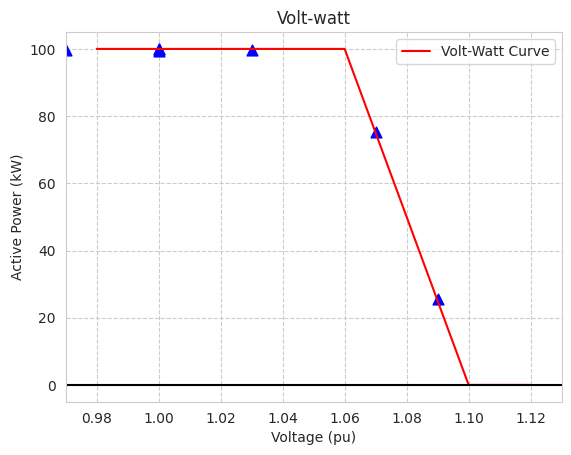

In [9]:
# show voltage - active power chart
xyplot.prepare_vp_plot()
xyplot.show()

Data points saved to the V-P chart is shown as blue triangles.

Volt-watt curve is shown as red lines. If not changed, IEEE 1547-2018 Default settings are used

As can be seen, DER output active power is limited by the volt-watt curve.

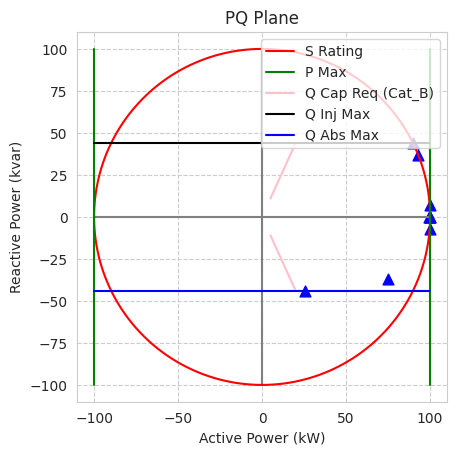

In [10]:
# show active power - reactive power chart
xyplot.prepare_pq_plot()
xyplot.show()

As can be seen, in all conditions, DER outputs are within the nameplate rating constraints.